In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import warnings


In [2]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 14.1 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import optuna
import matplotlib.pyplot as plt

train = pd.read_csv('train_Mortgage.csv')
val = pd.read_csv('val_Mortgage.csv')

X_train = train.drop('Mortgage', axis=1)
y_train = train['Mortgage']
X_val = val.drop('Mortgage', axis=1)
y_val = val['Mortgage']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

def objective(trial):
    params = {
        'kernel': 'rbf',
        'C': trial.suggest_float('C', 1e-3, 1e3, log=True),
        'gamma': trial.suggest_float('gamma', 1e-5, 1e2, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'probability': True,
        'cache_size': 1000
    }

    model = SVC(**params)
    scores = cross_val_score(model, X_train_scaled, y_train,
                           cv=3, scoring='roc_auc', n_jobs=-1)
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

best_params = study.best_params
best_params['kernel'] = 'rbf'
best_params['probability'] = True

final_model_mortgage_rbf = SVC(**best_params)
final_model_mortgage_rbf.fit(X_train_scaled, y_train)

y_proba = final_model_mortgage_rbf.predict_proba(X_val_scaled)[:, 1]
fpr_rbf, tpr_rbf, _ = roc_curve(y_val, y_proba)
roc_auc_rbf = roc_auc_score(y_val, y_proba)
print("\nOptimization Results:")
print(f"Best Validation AUC: {roc_auc_rbf:.4f}")
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param:>15}: {value}")

[I 2025-03-30 09:39:13,806] A new study created in memory with name: no-name-fed7eb8d-8300-49f8-a72c-614381033159
[I 2025-03-30 09:40:04,880] Trial 0 finished with value: 0.93731429768036 and parameters: {'C': 0.019038931633138613, 'gamma': 0.005999911014821608, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.93731429768036.
[I 2025-03-30 09:40:55,961] Trial 1 finished with value: 0.5767310083201337 and parameters: {'C': 89.1514203422962, 'gamma': 41.07979013592621, 'class_weight': None}. Best is trial 0 with value: 0.93731429768036.
[I 2025-03-30 09:41:32,487] Trial 2 finished with value: 0.764221947097977 and parameters: {'C': 0.06011751885723106, 'gamma': 3.6724197752909844, 'class_weight': None}. Best is trial 0 with value: 0.93731429768036.
[I 2025-03-30 09:41:53,568] Trial 3 finished with value: 0.9434946771351664 and parameters: {'C': 9.102140527569336, 'gamma': 0.00012767315212946427, 'class_weight': 'balanced'}. Best is trial 3 with value: 0.9434946771351664.
[I 202


Optimization Results:
Best Validation AUC: 0.9382

Best Parameters:
              C: 1.736433500314599
          gamma: 0.002869615526354882
   class_weight: balanced
         kernel: rbf
    probability: True


линейное ядро также не принесло результаов

In [11]:
def objective(trial):
    params = {
        'kernel': 'sigmoid',
        'C': trial.suggest_float('C', 1e-3, 1e3, log=True),
        'gamma': trial.suggest_float('gamma', 1e-5, 1e2, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'probability': True,  # Критически важный параметр
        'cache_size': 1000
    }

    model = SVC(**params)
    scores = cross_val_score(model, X_train_scaled, y_train,
                           cv=3, scoring='roc_auc', n_jobs=-1)
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

best_params = study.best_params.copy()
best_params.update({
    'kernel': 'sigmoid',
    'probability': True,
    'cache_size': 1000
})

final_model_mortgage_sigmoid = SVC(**best_params)
final_model_mortgage_sigmoid.fit(X_train_scaled, y_train)

y_proba = final_model_mortgage_sigmoid.predict_proba(X_val_scaled)[:, 1]
fpr_sigmoid, tpr_sigmoid, _ = roc_curve(y_val, y_proba)
roc_auc_sigmoid = roc_auc_score(y_val, y_proba)

print("\nOptimization Results:")
print(f"Best Validation AUC: {roc_auc_sigmoid:.4f}")
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param:>15}: {value}")

[I 2025-03-30 10:43:36,204] A new study created in memory with name: no-name-b105a4b4-ca7f-4ddf-b19e-083c668faace
[I 2025-03-30 10:44:15,901] Trial 0 finished with value: 0.9368413529057475 and parameters: {'C': 0.009198639717777667, 'gamma': 0.1593059294626863, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9368413529057475.
[I 2025-03-30 10:44:28,194] Trial 1 finished with value: 0.9432997434960058 and parameters: {'C': 0.2098298607866814, 'gamma': 0.015767386868294132, 'class_weight': None}. Best is trial 1 with value: 0.9432997434960058.
[I 2025-03-30 10:45:06,438] Trial 2 finished with value: 0.9387495922022792 and parameters: {'C': 0.8102181630197264, 'gamma': 0.00027734982246776406, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9432997434960058.
[I 2025-03-30 10:45:17,667] Trial 3 finished with value: 0.9421897080713303 and parameters: {'C': 0.001471083610515903, 'gamma': 5.3981249670664463e-05, 'class_weight': None}. Best is trial 1 with value: 0.943299


Optimization Results:
Best Validation AUC: 0.9379

Best Parameters:
              C: 235.11413081516093
          gamma: 8.391133830163074e-05
   class_weight: None
         kernel: sigmoid
    probability: True
     cache_size: 1000


в резудьате мы согли обцчить мроедь только для сигмоиды и rbf. Вот их RoC кривые

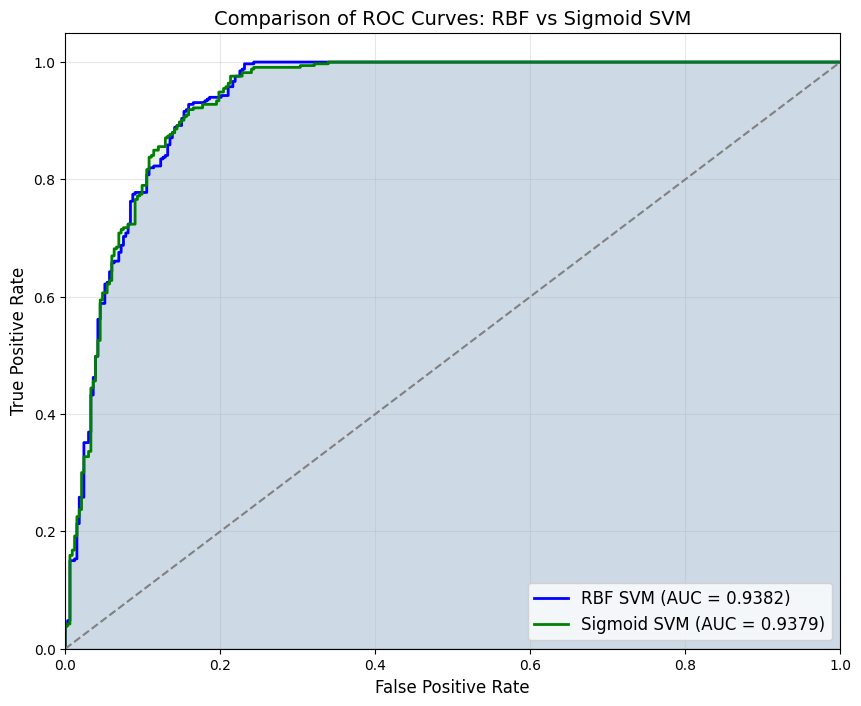

In [21]:
plt.figure(figsize=(10, 8))

plt.plot(fpr_rbf, tpr_rbf, color='blue', lw=2,
         label=f'RBF SVM (AUC = {roc_auc_rbf:.4f})')

plt.plot(fpr_sigmoid, tpr_sigmoid, color='green', lw=2,
         label=f'Sigmoid SVM (AUC = {roc_auc_sigmoid:.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.fill_between(fpr_rbf, tpr_rbf, alpha=0.1, color='blue')
plt.fill_between(fpr_sigmoid, tpr_sigmoid, alpha=0.1, color='green')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Comparison of ROC Curves: RBF vs Sigmoid SVM', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

таким образом мы видим, что результат не зависит от ядра

повторим предсказания для оставшихся признаков

In [22]:
train = pd.read_csv('train_Pension.csv')
val = pd.read_csv('val_Pension.csv')

X_train = train.drop('Pension', axis=1)
y_train = train['Pension']
X_val = val.drop('Pension', axis=1)
y_val = val['Pension']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

def objective(trial):
    params = {
        'kernel': 'rbf',
        'C': trial.suggest_float('C', 1e-3, 1e3, log=True),
        'gamma': trial.suggest_float('gamma', 1e-5, 1e2, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'probability': True,
        'cache_size': 1000
    }

    model = SVC(**params)
    scores = cross_val_score(model, X_train_scaled, y_train,
                           cv=3, scoring='roc_auc', n_jobs=-1)
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

best_params = study.best_params
best_params['kernel'] = 'rbf'
best_params['probability'] = True

final_model_Pension_rbf = SVC(**best_params)
final_model_Pension_rbf.fit(X_train_scaled, y_train)

y_proba = final_model_Pension_rbf.predict_proba(X_val_scaled)[:, 1]
fpr_rbf, tpr_rbf, _ = roc_curve(y_val, y_proba)
roc_auc_rbf = roc_auc_score(y_val, y_proba)
print("\nOptimization Results:")
print(f"Best Validation AUC: {roc_auc_rbf:.4f}")
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param:>15}: {value}")

[I 2025-03-30 13:16:03,749] A new study created in memory with name: no-name-16b119f7-74c0-4982-a266-4962ec60f77d
[I 2025-03-30 13:18:18,517] Trial 0 finished with value: 0.69277372743284 and parameters: {'C': 268.53759419975336, 'gamma': 0.0007020725739147746, 'class_weight': None}. Best is trial 0 with value: 0.69277372743284.
[I 2025-03-30 13:18:35,544] Trial 1 finished with value: 0.7559176973445059 and parameters: {'C': 0.0013987708532579334, 'gamma': 0.0019675451123915013, 'class_weight': None}. Best is trial 1 with value: 0.7559176973445059.
[I 2025-03-30 13:18:51,986] Trial 2 finished with value: 0.6594124218979236 and parameters: {'C': 0.02431591428009784, 'gamma': 0.002424498666926584, 'class_weight': None}. Best is trial 1 with value: 0.7559176973445059.
[I 2025-03-30 13:19:09,888] Trial 3 finished with value: 0.6850363493523702 and parameters: {'C': 0.010672432999709647, 'gamma': 0.023879066362446872, 'class_weight': None}. Best is trial 1 with value: 0.7559176973445059.
[I


Optimization Results:
Best Validation AUC: 0.7784

Best Parameters:
              C: 0.30674757973192535
          gamma: 0.00044508369810259416
   class_weight: balanced
         kernel: rbf
    probability: True


In [24]:
def objective(trial):
    params = {
        'kernel': 'sigmoid',
        'C': trial.suggest_float('C', 1e-3, 1e3, log=True),
        'gamma': trial.suggest_float('gamma', 1e-5, 1e2, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'probability': True,  # Критически важный параметр
        'cache_size': 1000
    }

    model = SVC(**params)
    scores = cross_val_score(model, X_train_scaled, y_train,
                           cv=3, scoring='roc_auc', n_jobs=-1)
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

best_params = study.best_params.copy()
best_params.update({
    'kernel': 'sigmoid',
    'probability': True,
    'cache_size': 1000
})

final_model_Pension_sigmoid = SVC(**best_params)
final_model_Pension_sigmoid.fit(X_train_scaled, y_train)

y_proba = final_model_Pension_sigmoid.predict_proba(X_val_scaled)[:, 1]
fpr_sigmoid, tpr_sigmoid, _ = roc_curve(y_val, y_proba)
roc_auc_sigmoid = roc_auc_score(y_val, y_proba)

print("\nOptimization Results:")
print(f"Best Validation AUC: {roc_auc_sigmoid:.4f}")
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param:>15}: {value}")

[I 2025-03-30 14:03:33,589] A new study created in memory with name: no-name-b1e4a4cc-8aae-4887-9719-5eda57f87e7d
[I 2025-03-30 14:04:08,708] Trial 0 finished with value: 0.6398601026203531 and parameters: {'C': 0.2037288613475469, 'gamma': 0.5710669675706975, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6398601026203531.
[I 2025-03-30 14:04:29,350] Trial 1 finished with value: 0.6121012546872362 and parameters: {'C': 1.0611370796549728, 'gamma': 0.15709737360182063, 'class_weight': None}. Best is trial 0 with value: 0.6398601026203531.
[I 2025-03-30 14:04:56,182] Trial 2 finished with value: 0.6701702389118607 and parameters: {'C': 64.86704867613429, 'gamma': 0.1428607813037213, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.6701702389118607.
[I 2025-03-30 14:05:40,827] Trial 3 finished with value: 0.7736569199495542 and parameters: {'C': 0.024289189797242823, 'gamma': 0.0020962855595784255, 'class_weight': 'balanced'}. Best is trial 3 with value: 0.773656919


Optimization Results:
Best Validation AUC: 0.7784

Best Parameters:
              C: 0.006971018115961187
          gamma: 0.032915064441405295
   class_weight: balanced
         kernel: sigmoid
    probability: True
     cache_size: 1000


как и с прошлым параметром оптимизация прошла только с sigmoid и rbf

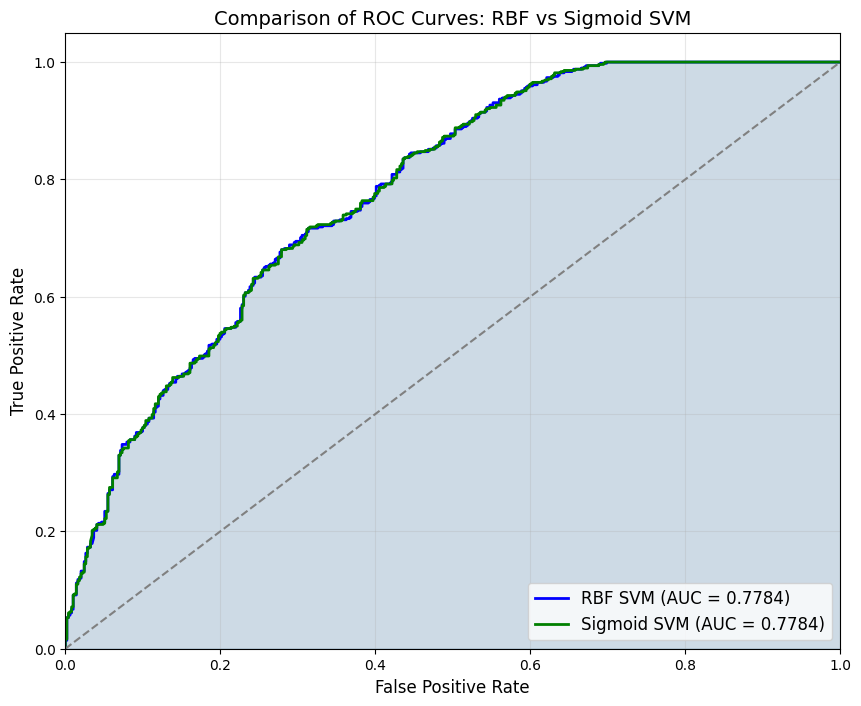

In [27]:
plt.figure(figsize=(10, 8))

plt.plot(fpr_rbf, tpr_rbf, color='blue', lw=2,
         label=f'RBF SVM (AUC = {roc_auc_rbf:.4f})')

plt.plot(fpr_sigmoid, tpr_sigmoid, color='green', lw=2,
         label=f'Sigmoid SVM (AUC = {roc_auc_sigmoid:.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.fill_between(fpr_rbf, tpr_rbf, alpha=0.1, color='blue')
plt.fill_between(fpr_sigmoid, tpr_sigmoid, alpha=0.1, color='green')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Comparison of ROC Curves: RBF vs Sigmoid SVM', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

теперь построим модель для Savings

In [28]:
train = pd.read_csv('train_Savings.csv')
val = pd.read_csv('val_Savings.csv')

X_train = train.drop('Savings', axis=1)
y_train = train['Savings']
X_val = val.drop('Savings', axis=1)
y_val = val['Savings']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

def objective(trial):
    params = {
        'kernel': 'rbf',
        'C': trial.suggest_float('C', 1e-3, 1e3, log=True),
        'gamma': trial.suggest_float('gamma', 1e-5, 1e2, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'probability': True,
        'cache_size': 1000
    }

    model = SVC(**params)
    scores = cross_val_score(model, X_train_scaled, y_train,
                           cv=3, scoring='roc_auc', n_jobs=-1)
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

best_params = study.best_params
best_params['kernel'] = 'rbf'
best_params['probability'] = True

final_model_Savings_rbf = SVC(**best_params)
final_model_Savings_rbf.fit(X_train_scaled, y_train)

y_proba = final_model_Savings_rbf.predict_proba(X_val_scaled)[:, 1]
fpr_rbf, tpr_rbf, _ = roc_curve(y_val, y_proba)
roc_auc_rbf = roc_auc_score(y_val, y_proba)
print("\nOptimization Results:")
print(f"Best Validation AUC: {roc_auc_rbf:.4f}")
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param:>15}: {value}")

[I 2025-03-30 15:16:11,384] A new study created in memory with name: no-name-b05d4b68-51bf-4563-9308-4b3024e1edbc
[I 2025-03-30 15:16:54,687] Trial 0 finished with value: 0.5448592069648389 and parameters: {'C': 0.19434572843235187, 'gamma': 4.533892865330508, 'class_weight': None}. Best is trial 0 with value: 0.5448592069648389.
[I 2025-03-30 15:17:32,444] Trial 1 finished with value: 0.6550342120860019 and parameters: {'C': 21.709560257807137, 'gamma': 0.0038090759414639067, 'class_weight': None}. Best is trial 1 with value: 0.6550342120860019.
[I 2025-03-30 15:18:11,520] Trial 2 finished with value: 0.5487064613208493 and parameters: {'C': 0.009728787647840543, 'gamma': 2.222653516714582, 'class_weight': None}. Best is trial 1 with value: 0.6550342120860019.
[I 2025-03-30 15:18:42,079] Trial 3 finished with value: 0.6623599608925987 and parameters: {'C': 0.013599599481536582, 'gamma': 0.008415788624722843, 'class_weight': None}. Best is trial 3 with value: 0.6623599608925987.
[I 202


Optimization Results:
Best Validation AUC: 0.6950

Best Parameters:
              C: 11.784268056358108
          gamma: 0.0005921563846307659
   class_weight: balanced
         kernel: rbf
    probability: True


In [29]:
def objective(trial):
    params = {
        'kernel': 'sigmoid',
        'C': trial.suggest_float('C', 1e-3, 1e3, log=True),
        'gamma': trial.suggest_float('gamma', 1e-5, 1e2, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'probability': True,  # Критически важный параметр
        'cache_size': 1000
    }

    model = SVC(**params)
    scores = cross_val_score(model, X_train_scaled, y_train,
                           cv=3, scoring='roc_auc', n_jobs=-1)
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

best_params = study.best_params.copy()
best_params.update({
    'kernel': 'sigmoid',
    'probability': True,
    'cache_size': 1000
})

final_model_Savings_sigmoid = SVC(**best_params)
final_model_Savings_sigmoid.fit(X_train_scaled, y_train)

y_proba = final_model_Savings_sigmoid.predict_proba(X_val_scaled)[:, 1]
fpr_sigmoid, tpr_sigmoid, _ = roc_curve(y_val, y_proba)
roc_auc_sigmoid = roc_auc_score(y_val, y_proba)

print("\nOptimization Results:")
print(f"Best Validation AUC: {roc_auc_sigmoid:.4f}")
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param:>15}: {value}")

[I 2025-03-30 15:39:51,549] A new study created in memory with name: no-name-30d7041d-6da9-4177-b79f-a05fb73de498
[I 2025-03-30 15:40:20,791] Trial 0 finished with value: 0.5305121577920967 and parameters: {'C': 423.5679908551778, 'gamma': 2.850380356135092, 'class_weight': None}. Best is trial 0 with value: 0.5305121577920967.
[I 2025-03-30 15:41:01,958] Trial 1 finished with value: 0.671860518639331 and parameters: {'C': 228.54425658289514, 'gamma': 3.171512914249012e-05, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.671860518639331.
[I 2025-03-30 15:41:35,968] Trial 2 finished with value: 0.6655299720316694 and parameters: {'C': 0.0019886667096633637, 'gamma': 0.00360143643954389, 'class_weight': None}. Best is trial 1 with value: 0.671860518639331.
[I 2025-03-30 15:42:23,372] Trial 3 finished with value: 0.6635761005464319 and parameters: {'C': 0.0015474410098369744, 'gamma': 0.0005128269505045949, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.671860518639


Optimization Results:
Best Validation AUC: 0.6937

Best Parameters:
              C: 50.73253470934908
          gamma: 0.00015382597270788428
   class_weight: balanced
         kernel: sigmoid
    probability: True
     cache_size: 1000


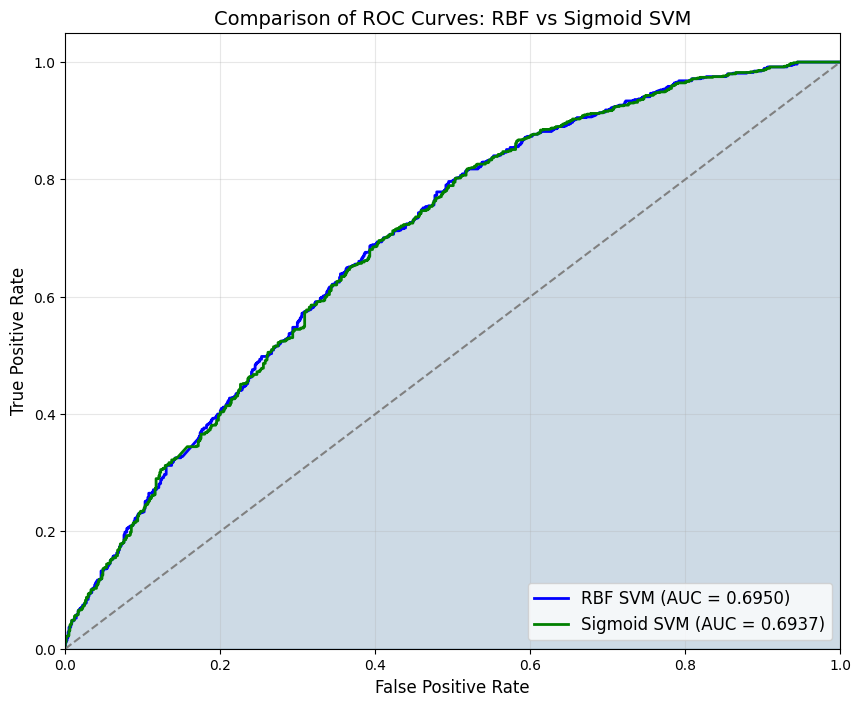

In [32]:
plt.figure(figsize=(10, 8))

plt.plot(fpr_rbf, tpr_rbf, color='blue', lw=2,
         label=f'RBF SVM (AUC = {roc_auc_rbf:.4f})')

plt.plot(fpr_sigmoid, tpr_sigmoid, color='green', lw=2,
         label=f'Sigmoid SVM (AUC = {roc_auc_sigmoid:.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.fill_between(fpr_rbf, tpr_rbf, alpha=0.1, color='blue')
plt.fill_between(fpr_sigmoid, tpr_sigmoid, alpha=0.1, color='green')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Comparison of ROC Curves: RBF vs Sigmoid SVM', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()